# Topic : Predicting Electric vehicle range based on features 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("C:\\Users\\ajayc\\Downloads\\Electric_Vehicle_Population_Data.csv")
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235687,1C4RJXN62R,Pierce,Tacoma,WA,98407.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,27.0,267004272,POINT (-122.51134 47.29238),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
235688,5YJSA1E28J,Snohomish,Stanwood,WA,98292.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249.0,0.0,10.0,198794410,POINT (-122.37265 48.24159),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.306105e+10
235689,3FA6P0SU2F,King,Redmond,WA,98052.0,2015,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,48.0,261742288,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
235690,WA1BCBFZ6P,Snohomish,Lake Stevens,WA,98258.0,2023,AUDI,Q4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,253474854,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10


In [7]:
print("Dataset info:")
print(df.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235692 non-null  object 
 1   County                                             235689 non-null  object 
 2   City                                               235689 non-null  object 
 3   State                                              235692 non-null  object 
 4   Postal Code                                        235689 non-null  float64
 5   Model Year                                         235692 non-null  int64  
 6   Make                                               235692 non-null  object 
 7   Model                                              235692 non-null  object 
 8   Electric Vehicle Type                              235692 no

In [9]:
print("Shape of the dataset:")
df.shape

Shape of the dataset:


(235692, 17)

In [11]:
print("Columns of the dataset:")
print(df.columns)

Columns of the dataset:
Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [13]:
print("statistical summary:")
print(df.describe())

statistical summary:
         Postal Code     Model Year  Electric Range      Base MSRP  \
count  235689.000000  235692.000000   235656.000000  235656.000000   
mean    98177.656463    2021.406658       46.262569     787.268328   
std      2524.218661       2.991908       84.045829    7177.668305   
min      1731.000000    2000.000000        0.000000       0.000000   
25%     98052.000000    2020.000000        0.000000       0.000000   
50%     98126.000000    2023.000000        0.000000       0.000000   
75%     98374.000000    2024.000000       38.000000       0.000000   
max     99577.000000    2025.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         235198.000000    2.356920e+05       2.356890e+05  
mean              28.879519    2.353127e+08       5.298066e+10  
std               14.904644    6.799098e+07       1.521066e+09  
min                1.000000    4.385000e+03       1.001020e+09  
25%               17.00

In [15]:
print("Null values of the dataset:")
print(df.isnull().sum())

Null values of the dataset:
VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        36
Base MSRP                                             36
Legislative District                                 494
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dty

In [17]:
print("null value percentage:")
null_percentage=(df.isnull().sum()/len(df))*100
print(null_percentage)


null value percentage:
VIN (1-10)                                           0.000000
County                                               0.001273
City                                                 0.001273
State                                                0.000000
Postal Code                                          0.001273
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.015274
Base MSRP                                            0.015274
Legislative District                                 0.209596
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.004243
Electric Utility                               

In [19]:
df.duplicated().sum()

0

In [21]:
# Handling Null Values
# numerical columns
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mean())
df['Electric Range'] = df['Electric Range'].fillna(df['Electric Range'].mean())
df['Base MSRP'] = df['Base MSRP'].fillna(df['Base MSRP'].mean())
df['Legislative District'] = df['Legislative District'].fillna(df['Legislative District'].mean())
df['DOL Vehicle ID'] = df['DOL Vehicle ID'].fillna(df['DOL Vehicle ID'].mean())
df['2020 Census Tract'] = df['2020 Census Tract'].fillna(df['2020 Census Tract'].mean())
#you can use median also depedning on the data distribution

In [23]:
# categorical columns
df['County'] = df['County'].fillna(df['County'].mode()[0])
df['City'] = df['City'].fillna(df['City'].mode()[0])
df['Vehicle Location'] = df['Vehicle Location'].fillna(df['Vehicle Location'].mode()[0])
df['Electric Utility'] = df['Electric Utility'].fillna(df['Electric Utility'].mode()[0])

In [25]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


In [27]:
print("Null values of the dataset:")
print(df.isnull().sum())

Null values of the dataset:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [29]:
# Differentiating Columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print Results
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']
Numerical Columns: ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']


# check skewness of the dataset 

In [31]:
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

# Compute skewness
skewness_values = df[columns].skew()
print("skewness of the columns:\n",skewness_values)

skewness of the columns:
 Postal Code            -29.436487
Model Year              -1.269370
Electric Range           1.848788
Base MSRP               15.790603
Legislative District    -0.430313
DOL Vehicle ID           0.055456
2020 Census Tract      -27.733378
dtype: float64


The dataset is asymmetrical.so we choose IQR method for outlier detection 

In [33]:
# Columns to check for outliers
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

# Function to detect outliers using IQR
def detect_outliers_iqr(data, columns):
    outliers = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    return outliers

# Detect outliers
outliers_iqr = detect_outliers_iqr(df, columns)

# Display outliers
for col, outlier_values in outliers_iqr.items():
    print(f"Outliers in {col}:\n{outlier_values}\n")

Outliers in Postal Code:
19        98908.0
31        98908.0
34        98942.0
44        98902.0
51        98908.0
           ...   
235675    99019.0
235676    99206.0
235677    99208.0
235682    99352.0
235683    99362.0
Name: Postal Code, Length: 15349, dtype: float64

Outliers in Model Year:
5         2012
26        2013
28        2013
118       2012
132       2013
          ... 
235445    2013
235486    2012
235498    2013
235518    2013
235678    2013
Name: Model Year, Length: 6455, dtype: int64

Outliers in Electric Range:
0         220.0
1         291.0
5         265.0
8         215.0
9         215.0
          ...  
235656    220.0
235658    259.0
235660    291.0
235681    249.0
235688    249.0
Name: Electric Range, Length: 38754, dtype: float64

Outliers in Base MSRP:
5         59900.0
46        69900.0
56        31950.0
101       44100.0
139       32250.0
           ...   
235566    31950.0
235573    69900.0
235614    52900.0
235621    31950.0
235636    31950.0
Name: Base MSR

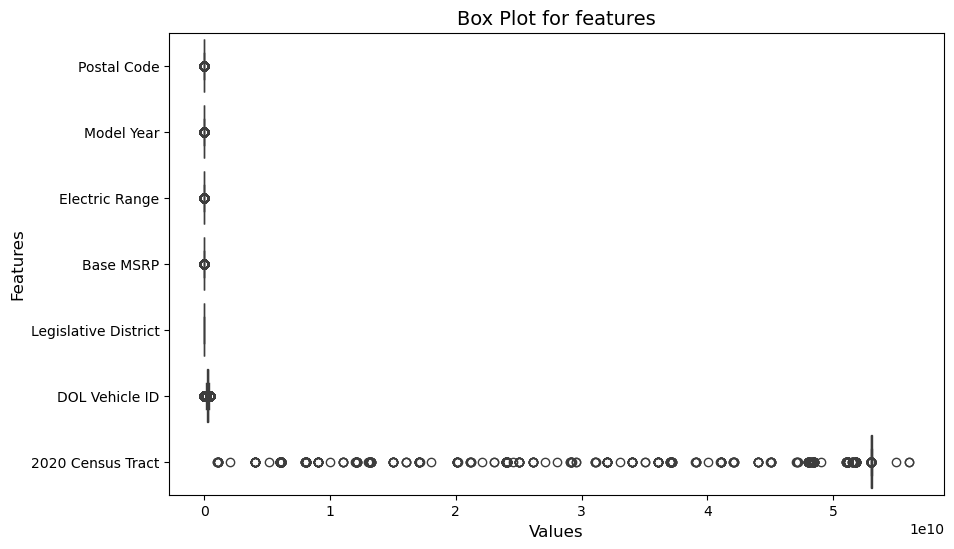

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

# Plotting the Box Plot for Electric Range"
plt.figure(figsize=(10, 6))

# Box plot for Electric Range" (excluding NaN values)
sns.boxplot(df[columns], orient='h')

# Adding title and labels
plt.title('Box Plot for features', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Display the plot
plt.show()

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# columns for capping outliers
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

# Function to cap outliers
def cap_outliers(df, columns):
    for col in columns:
        lower_bound = df[col].quantile(0.01)
        upper_bound = df[col].quantile(0.99)
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)  # Capping outliers
    return df

# Apply capping
df_capped = cap_outliers(df, columns)

print(df_capped)

        VIN (1-10)     County          City State  Postal Code  Model Year  \
0       5YJ3E1EBXK       King       Seattle    WA      98178.0        2019   
1       5YJYGDEE3L     Kitsap       Poulsbo    WA      98370.0        2020   
2       KM8KRDAF5P     Kitsap        Olalla    WA      98359.0        2023   
3       5UXTA6C0XM     Kitsap       Seabeck    WA      98380.0        2021   
4       JTMAB3FV7P   Thurston       Rainier    WA      98576.0        2023   
...            ...        ...           ...   ...          ...         ...   
235687  1C4RJXN62R     Pierce        Tacoma    WA      98407.0        2024   
235688  5YJSA1E28J  Snohomish      Stanwood    WA      98292.0        2018   
235689  3FA6P0SU2F       King       Redmond    WA      98052.0        2015   
235690  WA1BCBFZ6P  Snohomish  Lake Stevens    WA      98258.0        2023   
235691  WBY33AW03P       King      Issaquah    WA      98027.0        2023   

           Make       Model                   Electric Vehicle 

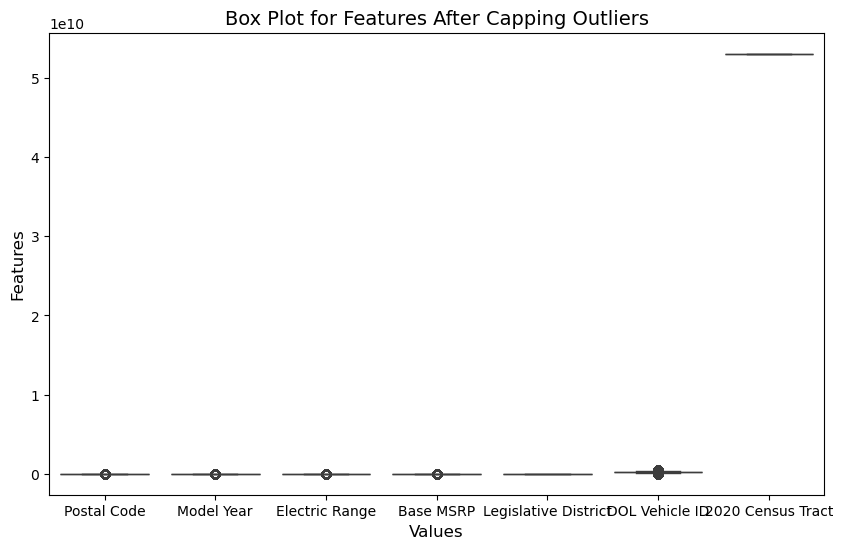

In [39]:
# Plotting the Box Plot after capping
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_capped[columns])  # No 'orient' needed
plt.title('Box Plot for Features After Capping Outliers', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Display the plot
plt.show()

In [41]:
df_capped.shape

(235692, 17)

In [43]:
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

# Compute skewness
skewness_values = df_capped[columns].skew()
print("skewness of the columns:\n",skewness_values)

skewness of the columns:
 Postal Code             1.751480
Model Year             -1.196215
Electric Range          1.831156
Base MSRP               8.406592
Legislative District   -0.430313
DOL Vehicle ID          0.062816
2020 Census Tract       0.210279
dtype: float64


In [45]:
df_capped.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                       float64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

# Exploratory data analysis (EDA)

In [47]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

# Uni-variate analysis 

In [49]:
# Taking a random sample of 50,000 rows from the DataFrame df_new
df_random = df_capped.sample(n=50000, random_state=42)  # random_state ensures reproducibility

# Displaying the final dataframe for further analysis and model building
df_random.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
99117,LVYBR0AL0J,Clark,Vancouver,WA,98686.0,2018,VOLVO,S90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,17.0,232611389.0,POINT (-122.62731 45.71668),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
71440,7SAYGDEF9N,King,Normandy Park,WA,98166.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,33.0,218047287.0,POINT (-122.34102 47.46593),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
100012,3FA6P0PUXE,Snohomish,Arlington,WA,98223.0,2014,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,39.0,198740972.0,POINT (-122.1264 48.19471),PUGET SOUND ENERGY INC,5.306105e+10
91904,1V2WNPE80P,Thurston,Olympia,WA,98501.0,2023,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,22.0,244745889.0,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
123868,1C4RJYB63R,King,Renton,WA,98057.0,2024,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,11.0,263271354.0,POINT (-122.20489 47.47532),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


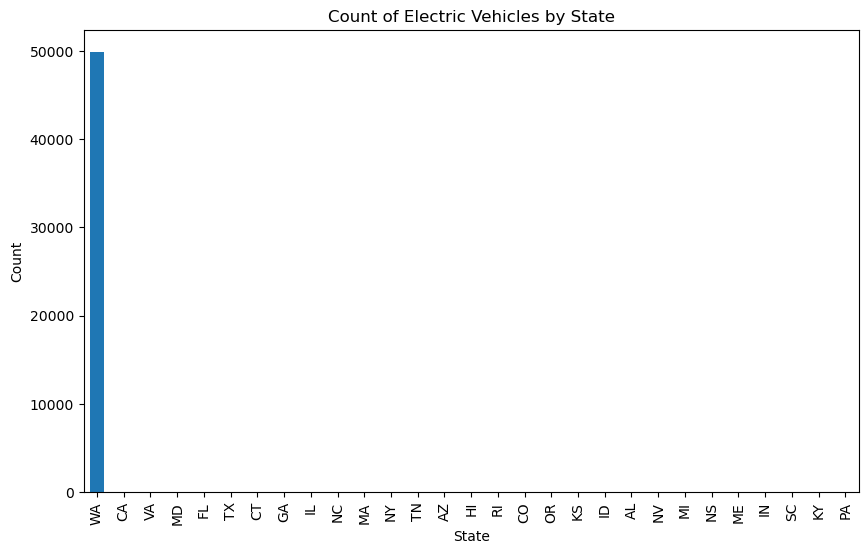

In [51]:
# Distribution of number of Electric Vehicles by State
plt.figure(figsize=(10, 6))
df_random['State'].value_counts().plot(kind='bar')
plt.title("Count of Electric Vehicles by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

The most number of electric vehicles are in WA (Washington state)

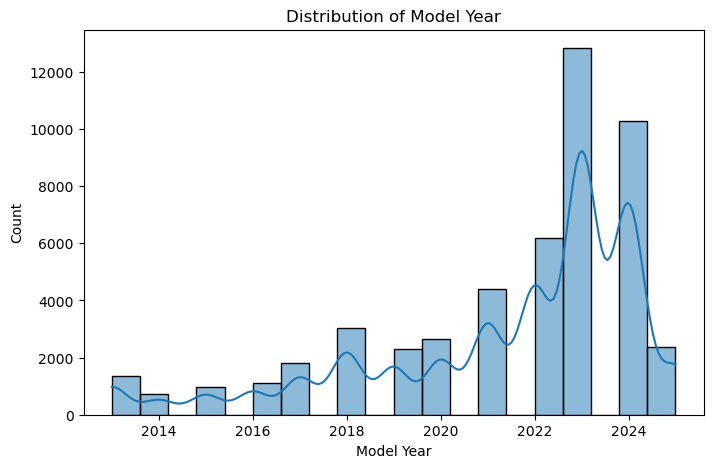

In [53]:
# Distribution of Model Year
plt.figure(figsize=(8, 5))
sns.histplot(df_random['Model Year'], bins=20, kde=True)
plt.title("Distribution of Model Year")
plt.show()

In this diagram, the year 2022 are the most number of electri vehicle produced 

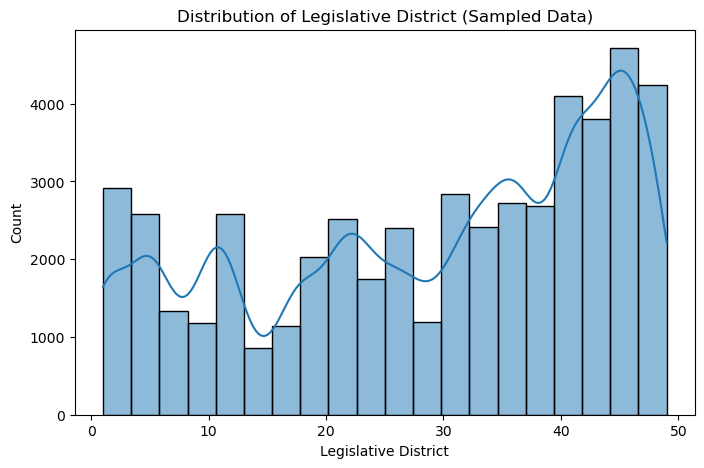

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of Electric Range with a sample
plt.figure(figsize=(8, 5))
sns.histplot(df_random['Legislative District'], bins=20, kde=True)
plt.title("Distribution of Legislative District (Sampled Data)")
plt.show()

In this diagram, the 40-50 of legislative district are the most number of electric vehicles.

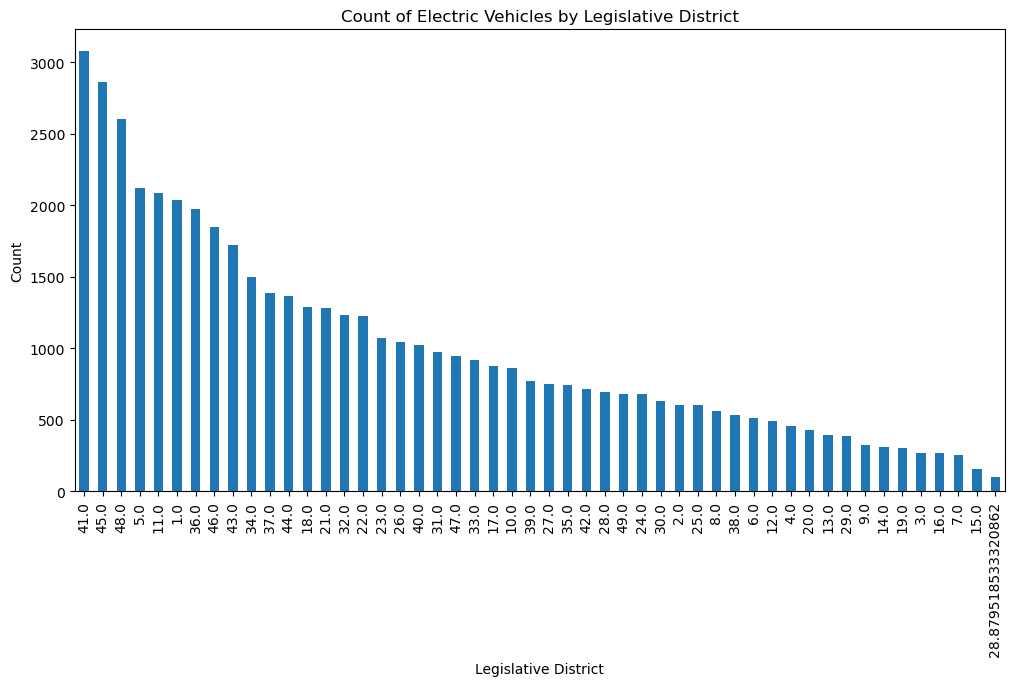

In [57]:
# Number of Electric vehicles per Legislative District
plt.figure(figsize=(12, 6))
df_random['Legislative District'].value_counts().plot(kind='bar')
plt.title("Count of Electric Vehicles by Legislative District")
plt.xlabel("Legislative District")
plt.ylabel("Count")
plt.show()

In this diagram, the 41.0 of legislative district are the most number of electric vehicles.

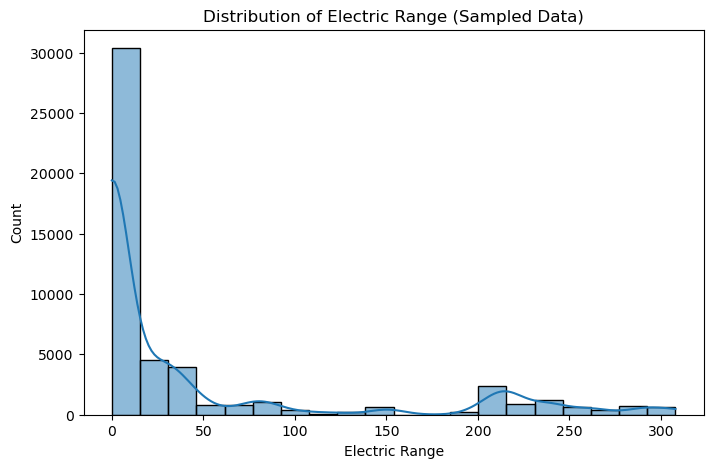

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of Electric Range with a sample
plt.figure(figsize=(8, 5))
sns.histplot(df_random['Electric Range'], bins=20, kde=True)
plt.title("Distribution of Electric Range (Sampled Data)")
plt.show()


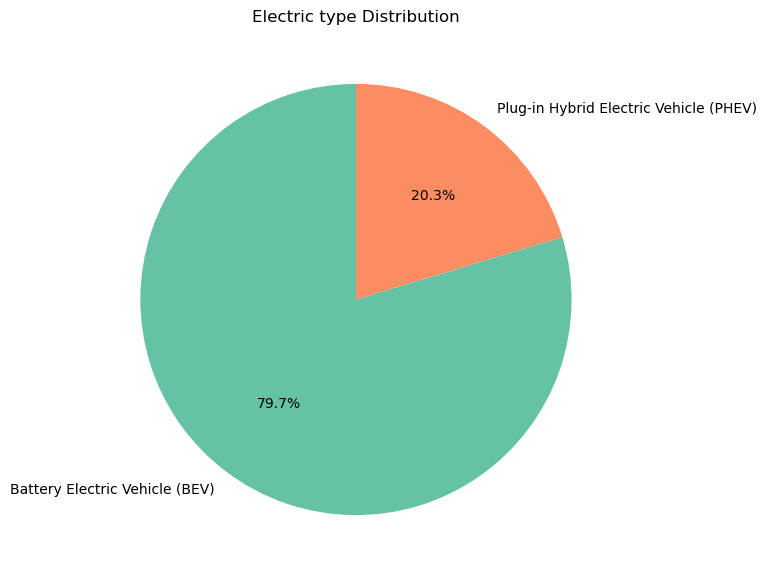

In [61]:
# Pie Diagram for Electric Vehicle Types(percentage distribution)
plt.figure(figsize=(7, 7))
df_random['Electric Vehicle Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'], startangle=90)
plt.title("Electric type Distribution")
plt.ylabel("")  # Remove y-axis label
plt.show()

In this diagram, most of the electric vehicles are BEV type (Battery electric vehicle-79.7%).

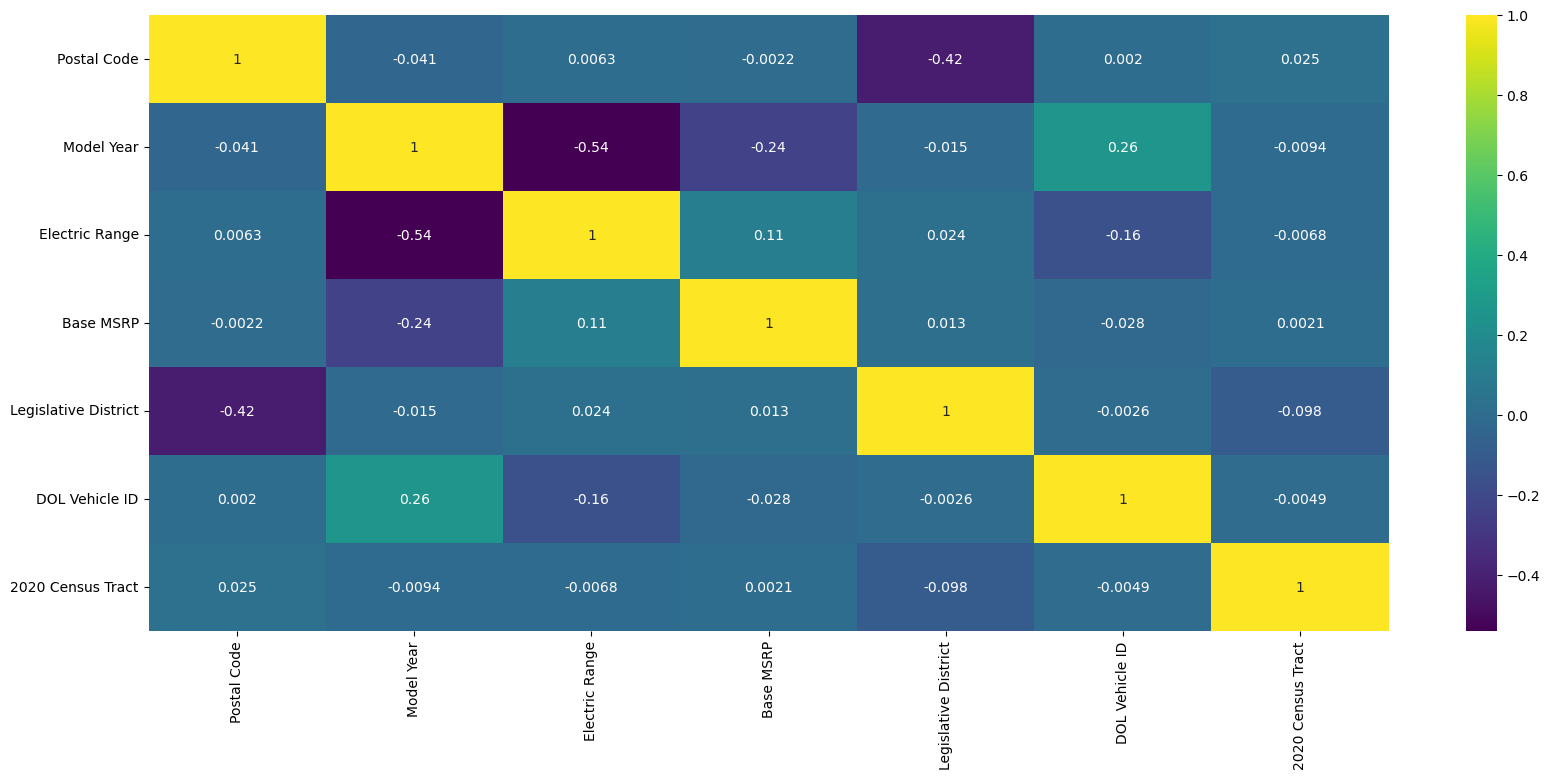

In [63]:
#Correlation matrix : Relationship between the numerical columns 
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df_random.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

# Formatting
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show plot
plt.show()


In the correlation metrix, there is no multicollinearity.

# BI-Variate analysis 

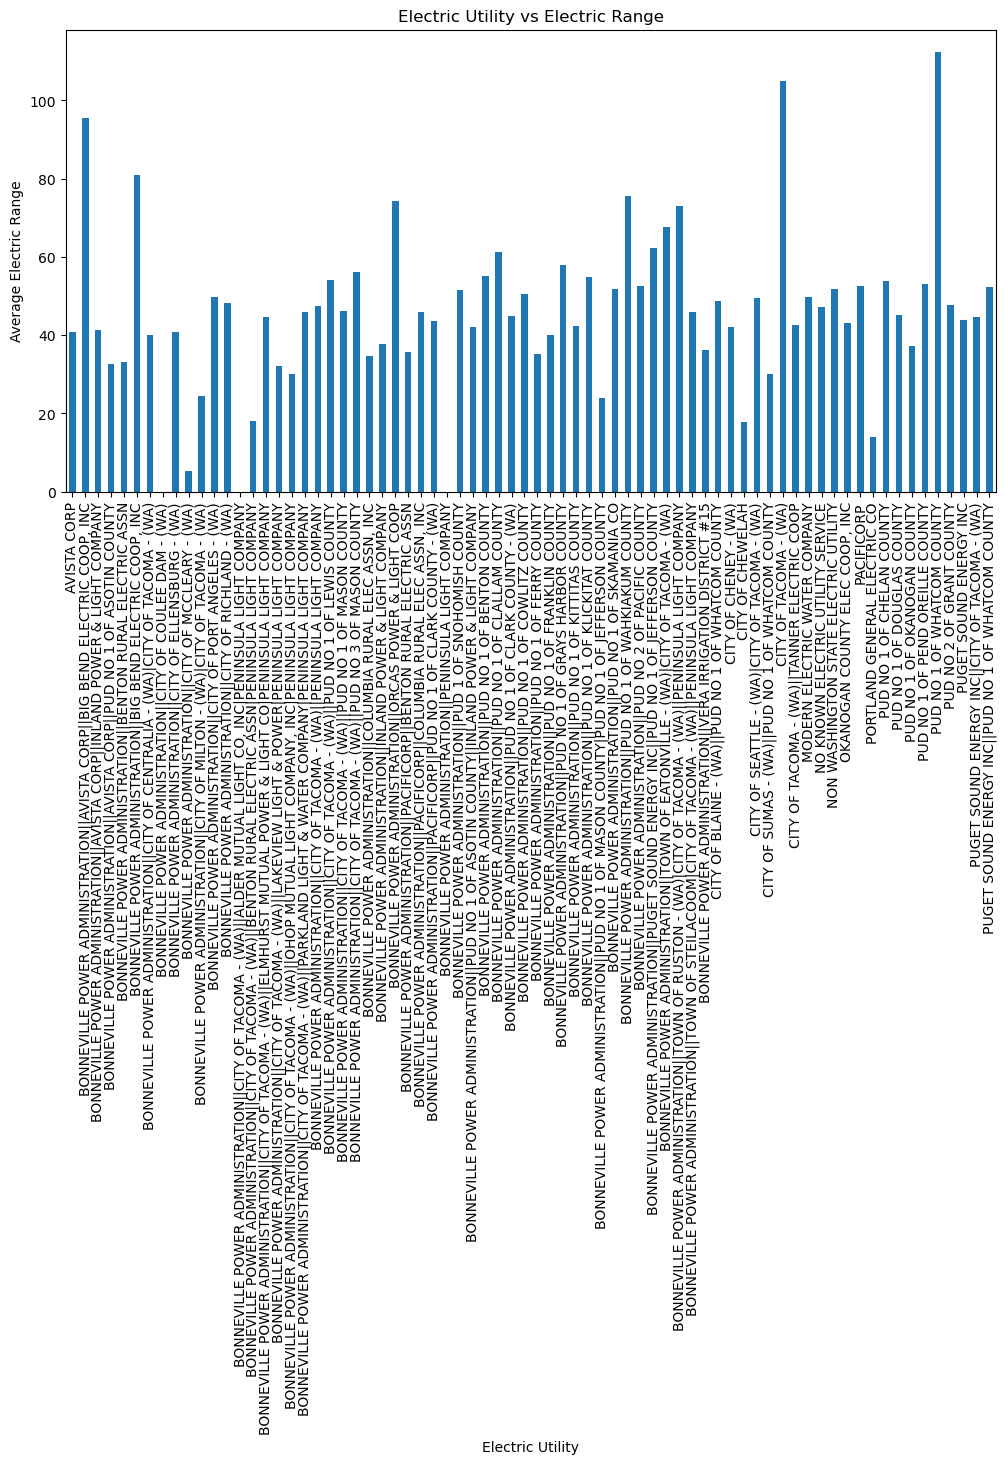

In [65]:
# Electric Utility vs Electric Range (Bar Chart)
plt.figure(figsize=(12, 6))
df_random.groupby('Electric Utility')['Electric Range'].mean().plot(kind='bar')
plt.title("Electric Utility vs Electric Range")
plt.xlabel("Electric Utility")
plt.ylabel("Average Electric Range")
plt.xticks(rotation=90)
plt.show()

In this diagram, the PUD NO 1 OF WHATCOM COUNTY is the highest electric utility provider.It indicate better infrastructure, efficient power supply, or more advanced vehicle models using their services.

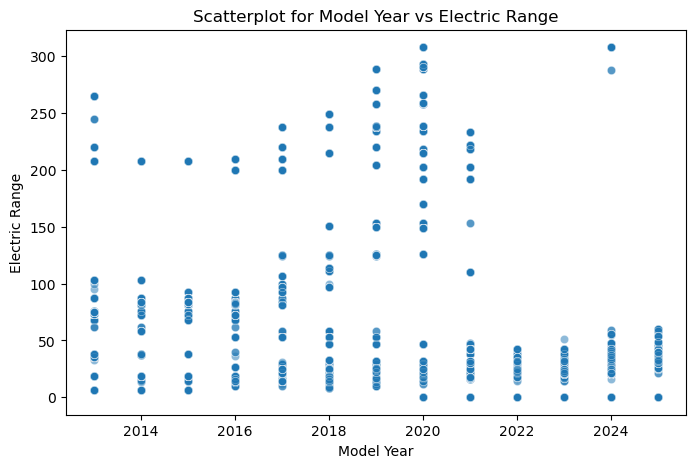

In [67]:
# Relationship between Model Year and Electric Range 
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_random['Model Year'], y=df_random['Electric Range'], alpha=0.5)
plt.title("Scatterplot for Model Year vs Electric Range")
plt.xlabel("Model Year")
plt.ylabel("Electric Range")
plt.show()

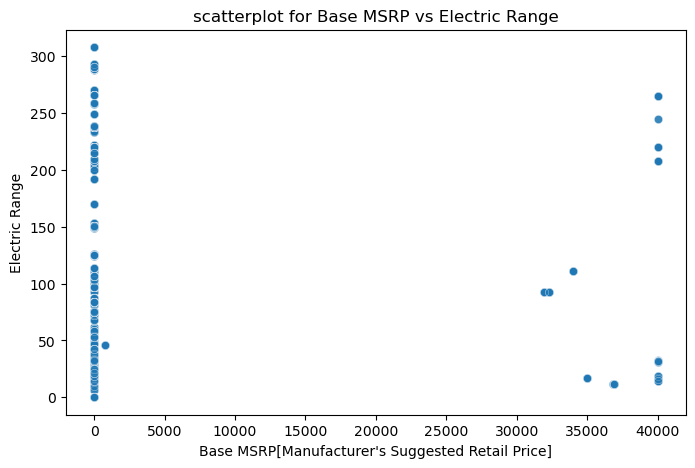

In [69]:
# Base MSRP vs Electric Range
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_random['Base MSRP'], y=df_random['Electric Range'], alpha=0.5)
plt.title("scatterplot for Base MSRP vs Electric Range")
plt.xlabel("Base MSRP[Manufacturer's Suggested Retail Price]")
plt.ylabel("Electric Range")
plt.show()

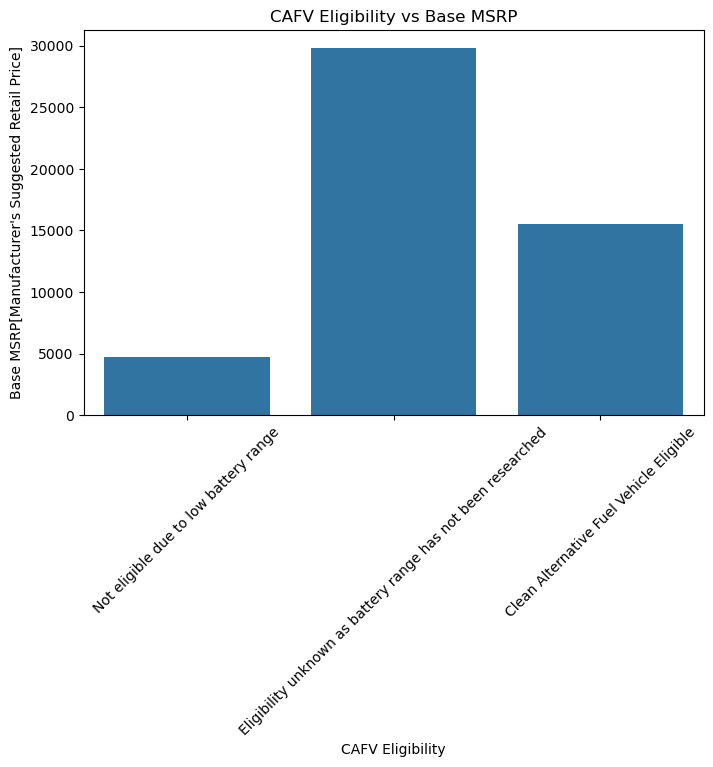

In [71]:
# Clean Alternative Fuel Vehicle (CAFV) Eligibility vs Base MSRP
plt.figure(figsize=(8, 5))
sns.countplot(x=df_random['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
plt.title("CAFV Eligibility vs Base MSRP")
plt.xlabel("CAFV Eligibility")
plt.ylabel("Base MSRP[Manufacturer's Suggested Retail Price]")
plt.xticks(rotation=45)
plt.show()

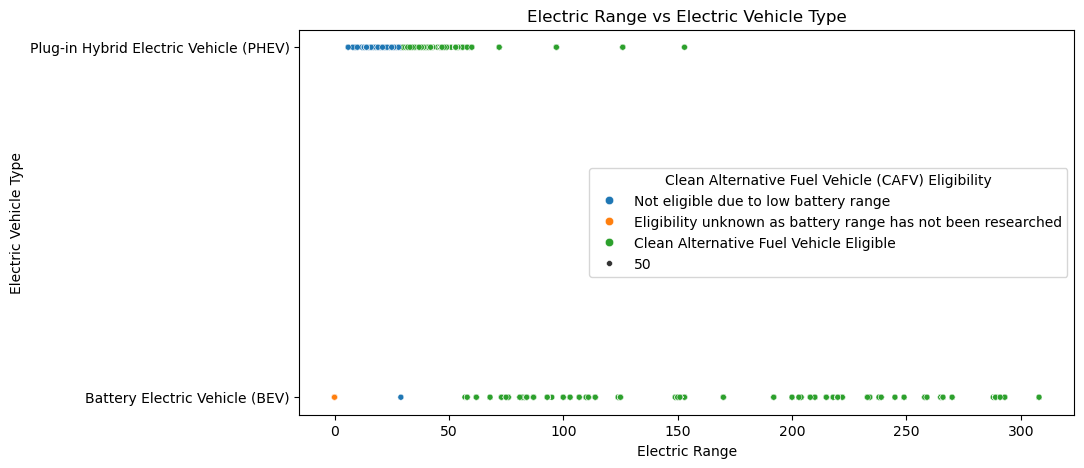

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df_random, 
    x="Electric Range", 
    y="Electric Vehicle Type", 
    hue="Clean Alternative Fuel Vehicle (CAFV) Eligibility", 
    size=50  # This is incorrect, should be removed or modified
)

# Title and labels
plt.title('Electric Range vs Electric Vehicle Type')
plt.xlabel("Electric Range")
plt.ylabel("Electric Vehicle Type")

# Show plot
plt.show()


# multivariate analysis

<Axes: >

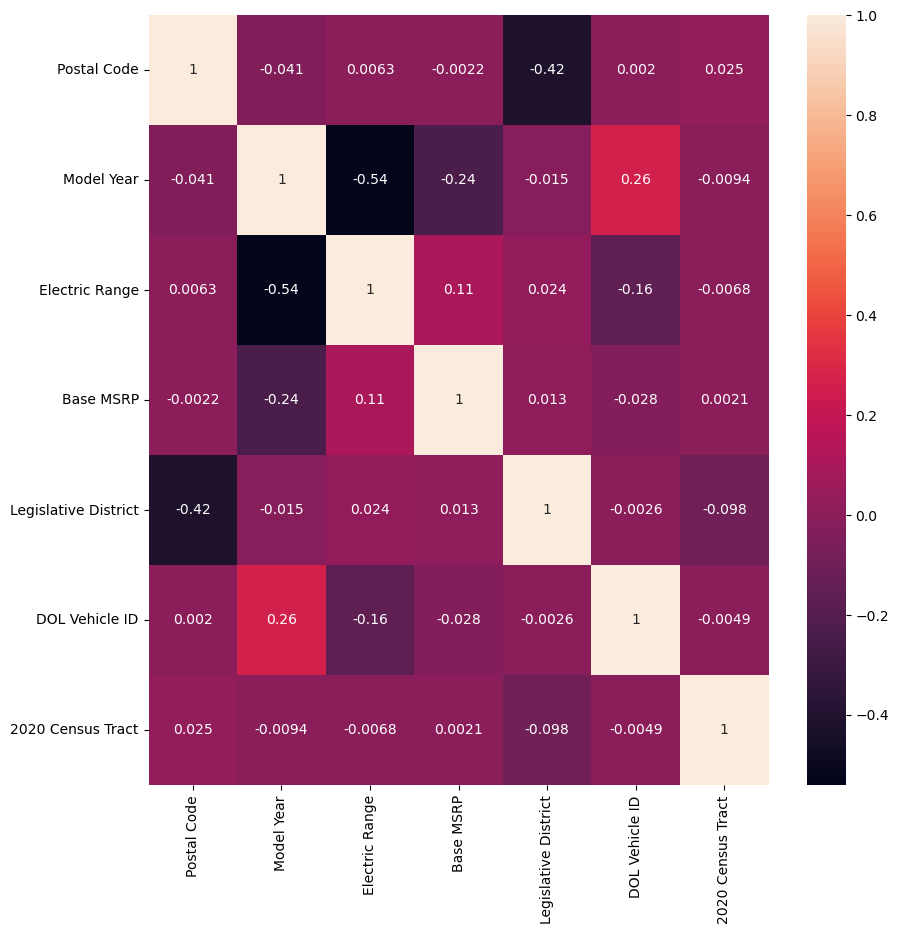

In [75]:
correlation_matrix = df_random.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix,annot=True)

# Encoding categorical data

In [77]:
categorical_columns=df.select_dtypes(include=["object","category"]).columns.tolist()

print("Categorical_columns:",categorical_columns)

Categorical_columns: ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']


In [79]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
print(df)

        VIN (1-10)  County  City  State  Postal Code  Model Year  Make  Model  \
0             4317      94   628     45      98178.0        2019    39     96   
1             5336      96   554     45      98370.0        2020    39     99   
2             7776      96   497     45      98359.0        2023    17     84   
3             4085      96   625     45      98380.0        2021     5    164   
4             7041     191   569     45      98576.0        2023    41    128   
...            ...     ...   ...    ...          ...         ...   ...    ...   
235687          80     148   689     45      98407.0        2024    19    162   
235688        4641     178   672     45      98292.0        2018    39     97   
235689        2723      94   575     45      98052.0        2015    13     62   
235690        9940     178   352     45      98258.0        2023     2    117   
235691       11078      94   320     45      98027.0        2023     5     77   

        Electric Vehicle Ty

In [81]:
# Selecting the first 100 rows
correlation_matrix = df_capped.corr(numeric_only=True)
print(correlation_matrix.corr()["Electric Range"].sort_values(ascending=False))

Electric Range                                       1.000000
Base MSRP                                            0.277854
Vehicle Location                                     0.067136
Make                                                 0.048895
Legislative District                                 0.048087
Postal Code                                          0.023183
City                                                 0.022315
2020 Census Tract                                    0.018363
State                                                0.017705
County                                               0.017515
Electric Utility                                    -0.026922
Model                                               -0.089736
Electric Vehicle Type                               -0.126381
VIN (1-10)                                          -0.312104
DOL Vehicle ID                                      -0.355316
Model Year                                          -0.821899
Clean Al

# Feature selection

In [83]:
from sklearn.feature_selection import SelectKBest,f_classif

In [85]:
X = df_capped.drop(columns=["Electric Range"])  # Features
y = df_capped["Electric Range"]  # Target

select_k = SelectKBest(score_func=f_classif, k=4)  # Selecting top 10 features
X_selected = select_k.fit_transform(X, y)

# Get selected feature names and scores
selected_features = X.columns[select_k.get_support()]
selected_scores = select_k.scores_[select_k.get_support()]

print("Selected Features:\n", selected_features)
print("Feature Scores based on select_k:\n", selected_scores)

Selected Features:
 Index(['Model Year', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Base MSRP'],
      dtype='object')
Feature Scores based on select_k:
 [   9440.53770041 1554667.76444467              inf    2619.72292175]


For model building and evaluation, I chose 50,000 rows from the dataset because it contains more than 200,000 rows, and processing the entire dataset takes too much time.

In [87]:
# Taking a random sample of 50,000 rows 
df_sample= df_capped.sample(n=50000, random_state=42)  # random_state ensures reproducibility

# Displaying the final dataframe for further analysis and model building
df_sample.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
99117,9125,36,730,45,98686.0,2018,44,136,1,2,21.0,0.0,17.0,232611389.0,567,36,5.301104e+10
71440,6167,94,475,45,98166.0,2022,39,99,0,1,0.0,0.0,33.0,218047287.0,465,74,5.303303e+10
100012,2700,178,25,45,98223.0,2014,13,62,1,2,19.0,0.0,39.0,198740972.0,373,73,5.306105e+10
91904,2285,191,500,45,98501.0,2023,43,82,0,1,0.0,0.0,22.0,244745889.0,625,73,5.306701e+10
123868,137,94,577,45,98057.0,2024,19,67,1,2,25.0,0.0,11.0,263271354.0,397,74,5.303303e+10


# Split Data into Training and Testing Sets

In [89]:
from sklearn.model_selection import train_test_split

In [91]:
X = df_sample.drop(columns=["Electric Range"])  # Features
y = df_sample["Electric Range"]  # Target

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("\n Training data (Features):")
print(X_train)
print("\n Testing data (Features):")
print(X_test)


 Training data (Features):
        VIN (1-10)  County  City  State  Postal Code  Model Year  Make  Model  \
74810          952      94   339     45      98033.0        2023     8     20   
207576        4934      94   628     45      98121.0        2015    39     97   
95475          791      36   730     45      98663.0        2020     8     21   
130365        4225      36   751     45      98671.0        2024    39     96   
44836         7164      36   730     45      98682.0        2023    41    128   
...            ...     ...   ...    ...          ...         ...   ...    ...   
28006         4248      94    83     45      98168.0        2022    39     96   
124459        4261     178   352     45      98258.0        2019    39     96   
64311          864      16   582     45      99350.0        2017     8     21   
121186        7064     204    50     45      98229.0        2024    38    141   
107168        4736      36   730     45      98686.0        2024    39     97   


# Feature scaling 

In [95]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler_standard=StandardScaler()
X_train_scaled=scaler_standard.fit_transform(X_train)
X_test_scaled=scaler_standard.transform(X_test)

In [99]:
print("\n  X _train_scaled:")
print(X_train_scaled)
print("\n X_test_scaled:")
print(X_test_scaled)


  X _train_scaled:
[[-1.4466668  -0.44125852 -0.42675204 ... -0.28374828  0.67732607
  -0.4289912 ]
 [-0.1377185  -0.44125852  0.80297394 ...  0.30841451 -0.19965508
  -0.42992896]
 [-1.49959013 -1.68580124  1.23699488 ...  1.28062206 -1.28298473
  -1.7670949 ]
 ...
 [-1.47559384 -2.1149539   0.60723901 ... -1.98953062 -2.52107577
  -2.13417536]
 [ 0.56244721  1.91908111 -1.65647803 ...  0.67078278  0.7289132
   2.00462729]
 [-0.20280433 -1.68580124  1.23699488 ...  1.19223955 -1.28298473
  -1.76710659]]

 X_test_scaled:
[[ 1.48975589 -0.44125852  0.80297394 ...  0.0962965  -0.19965508
  -0.42978901]
 [ 0.15155184 -0.44125852  0.72212691 ... -0.7433373   0.67732607
  -0.42840012]
 [ 2.30595846  1.91908111 -1.65647803 ...  0.71497403  0.7289132
   2.00460909]
 ...
 [-0.64690005  1.42555555  0.9519027  ... -2.84684091 -3.03694703
   1.39649212]
 [ 0.25082416 -2.1149539   0.60723901 ... -1.98953062 -2.52107577
  -2.13417536]
 [ 0.25476876 -1.68580124  1.23699488 ...  1.28062206 -1.282984

# Model training 

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [103]:
models={
       "Linear Regression": LinearRegression(fit_intercept=True,positive=False),
       "Decision Tree Regressor": DecisionTreeRegressor(max_depth=100,random_state=100),
       "Support Vector Regressor": SVR(kernel='rbf',max_iter=-1),
       "Random Forest Regressor": RandomForestRegressor(random_state=42),
       "Gradient Boosting Regressor":GradientBoostingRegressor(max_depth=3,n_estimators=100)
}

# Model Evaluation

In [105]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [107]:
model_results={}
for name,model in models.items():
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    mae=mean_absolute_error(y_test,predictions)
    mse=mean_squared_error(y_test,predictions)
    r2=r2_score(y_test,predictions)
    rmse=mean_squared_error(y_test,predictions,squared=False)
    model_results[name]={"MAE":mae,"MSE":mse,"R2":r2,"RMSE":rmse}

# calculate evaluation metrics

In [109]:
for name,metrics in model_results.items():
    print(f"\n{name} performance:")
    for metric,value in metrics.items():
        print(f"{metric}:{value:.4f}")


Linear Regression performance:
MAE:40.9366
MSE:3197.2814
R2:0.5419
RMSE:56.5445

Decision Tree Regressor performance:
MAE:0.0915
MSE:4.6015
R2:0.9993
RMSE:2.1451

Support Vector Regressor performance:
MAE:46.5220
MSE:9132.8164
R2:-0.3085
RMSE:95.5658

Random Forest Regressor performance:
MAE:0.1307
MSE:3.4242
R2:0.9995
RMSE:1.8505

Gradient Boosting Regressor performance:
MAE:3.1830
MSE:59.8184
R2:0.9914
RMSE:7.7342


# To find overfitting in the models 

In [111]:
# Overfitting Linear Regression (No regularization)
lin_reg = LinearRegression(fit_intercept=True, positive=False)
lin_reg.fit(X_train, y_train)
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

In [113]:
print("Overfitted Linear Regression - Train Accuracy:", r2_score(y_train, y_train_pred))
print("Overfitted Linear Regression - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted Linear Regression - Train Accuracy: 0.5484598405625816
Overfitted Linear Regression - Test Accuracy: 0.54191484644864


In [115]:
Dec_reg=DecisionTreeRegressor(max_depth=100,random_state=100)
Dec_reg.fit(X_train, y_train)
y_train_pred = Dec_reg.predict(X_train)
y_test_pred = Dec_reg.predict(X_test)

In [117]:
print("Overfitted DecisionTree Regression - Train Accuracy:", r2_score(y_train, y_train_pred))
print("Overfitted DecisionTree Regression - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted DecisionTree Regression - Train Accuracy: 1.0
Overfitted DecisionTree Regression - Test Accuracy: 0.9993407277788441


In [119]:
supp_reg=SVR(kernel='rbf',verbose=False,max_iter=-1)
supp_reg.fit(X_train, y_train)
y_train_pred = supp_reg.predict(X_train)
y_test_pred = supp_reg.predict(X_test)

In [120]:
print("Overfitted Support Vector Regression - Train Accuracy:", r2_score(y_train, y_train_pred))
print("Overfitted Support Vector Regression - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted Support Vector Regression - Train Accuracy: -0.30083757169811376
Overfitted Support Vector Regression - Test Accuracy: -0.3084890030329688


In [123]:
Random_reg=RandomForestRegressor(max_depth=100,n_estimators=100)
Random_reg.fit(X_train, y_train)
y_train_pred = Random_reg.predict(X_train)
y_test_pred = Random_reg.predict(X_test)

In [125]:
print("Overfitted Random Forest Regression - Train Accuracy:", r2_score(y_train, y_train_pred))
print("Overfitted Random Forest Regression - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted Random Forest Regression - Train Accuracy: 0.9999356903403877
Overfitted Random Forest Regression - Test Accuracy: 0.9994562688897498


In [127]:
GB_reg=GradientBoostingRegressor(n_estimators=100,random_state=100,max_features=4)
GB_reg.fit(X_train,y_train)
y_train_pred = GB_reg.predict(X_train)
y_test_pred = GB_reg.predict(X_test)

In [129]:
print("Overfitted Gradient Boosting Regression - Train Accuracy:", r2_score(y_train, y_train_pred))
print("Overfitted Gradient Boosting Regression - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted Gradient Boosting Regression - Train Accuracy: 0.9833484199439271
Overfitted Gradient Boosting Regression - Test Accuracy: 0.9822507937285648


# CROSS VALIDATION

In [137]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
# Initialize Decision Tree Regression model
model2 = DecisionTreeRegressor()

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Perform cross-validation and get scores (default scoring is R^2)
scores = cross_val_score(model2, X_train, y_train, cv=kf, scoring='r2')

print("Cross-Validation R² Scores:", scores)
print("Mean R² Score:", np.mean(scores))

# If Mean Squared Error (MSE) as the evaluation metric
mse_scores = -cross_val_score(model2, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print("Cross-Validation MSE Scores:", mse_scores)
print("Mean MSE Score:", np.mean(mse_scores))

Cross-Validation R² Scores: [0.99957019 0.99939793 0.99901465 0.99946963 0.99918557]
Mean R² Score: 0.9993275923000869
Cross-Validation MSE Scores: [3.83420439 3.79025    7.19272719 4.23775    6.685625  ]
Mean MSE Score: 5.148111316939695


In [141]:
model2.fit(X_train,y_train)
predictions=model.predict(X_test)
mae=mean_absolute_error(y_test,predictions)
mse=mean_squared_error(y_test,predictions)
r2=r2_score(y_test,predictions)
rmse=mean_squared_error(y_test,predictions,squared=False)
models[name]={"MAE":mae,"MSE":mse,"R2":r2,"RMSE":rmse}

In [143]:
for name,metrics in model_results.items():
    print(f"\n{name} performance:")
    for metric,value in metrics.items():
        print(f"{metric}:{value:.4f}")


Linear Regression performance:
MAE:40.9366
MSE:3197.2814
R2:0.5419
RMSE:56.5445

Decision Tree Regressor performance:
MAE:0.0915
MSE:4.6015
R2:0.9993
RMSE:2.1451

Support Vector Regressor performance:
MAE:46.5220
MSE:9132.8164
R2:-0.3085
RMSE:95.5658

Random Forest Regressor performance:
MAE:0.1307
MSE:3.4242
R2:0.9995
RMSE:1.8505

Gradient Boosting Regressor performance:
MAE:3.1830
MSE:59.8184
R2:0.9914
RMSE:7.7342


After the cross validation the metrics are remains same.

In [145]:
best_model=max(model_results,key=lambda x: model_results[x]["R2"])
worst_model=min(model_results,key=lambda x: model_results[x]["R2"])

print("best_model:", best_model,model_results[best_model])
print("worst_model:", worst_model,model_results[worst_model])

best_model: Random Forest Regressor {'MAE': 0.1306944637946838, 'MSE': 3.424174272129562, 'R2': 0.999509407154621, 'RMSE': 1.850452450653505}
worst_model: Support Vector Regressor {'MAE': 46.52195864119599, 'MSE': 9132.816390928618, 'R2': -0.3084890030329688, 'RMSE': 95.56576997507328}


In [147]:
best_model=max(model_results,key=lambda x: model_results[x]["MSE"])
worst_model=min(model_results,key=lambda x: model_results[x]["MSE"])

print("best_model:", best_model,model_results[best_model])
print("worst_model:", worst_model,model_results[worst_model])

best_model: Support Vector Regressor {'MAE': 46.52195864119599, 'MSE': 9132.816390928618, 'R2': -0.3084890030329688, 'RMSE': 95.56576997507328}
worst_model: Random Forest Regressor {'MAE': 0.1306944637946838, 'MSE': 3.424174272129562, 'R2': 0.999509407154621, 'RMSE': 1.850452450653505}


In [ ]:
After the performance evaluation, the Random forest Regressor is the best model as compared to other models with R2 score.

In [ ]:
After the performance evaluation, the Support Vector Regressor is the best model as compared to other models with MSE score.